# Import the file 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

When importing data, Pandas may interpret country codes such as "NA" as NULL values. To prevent this, we can set "keep_default_na" to false, ensuring that these codes are correctly recognized and not treated as missing values

In [54]:
covid_data = pd.read_csv('WHO-COVID-19-global-data.csv', keep_default_na= False)

# Explore the data

## Overview of the data

In [55]:
# ANSI escape codes for green text and bold text
GREEN = '\033[92m'
BOLD = '\033[1m'
RESET = '\033[0m'  # Resets the style to default

print(f"{GREEN}{BOLD}Number of rows:{RESET}", covid_data.shape[0])

print(f"{GREEN}{BOLD}Data types of each column:{RESET}")
print(covid_data.dtypes)
print(f"{GREEN}{BOLD}Unique values in each column:{RESET}")
print(covid_data.nunique())
print(f"{GREEN}{BOLD}A few rows of the data:{RESET}")
print(covid_data.head())

Number of rows: 49920
Data types of each column:
Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object
Unique values in each column:
Date_reported          208
Country_code           235
Country                235
WHO_region               7
New_cases            11824
Cumulative_cases     31310
New_deaths            2123
Cumulative_deaths    13464
dtype: int64
A few rows of the data:
  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO          0   
1    2020-01-12           AF  Afghanistan       EMRO          0   
2    2020-01-19           AF  Afghanistan       EMRO          0   
3    2020-01-26           AF  Afghanistan       EMRO          0   
4    2020-02-02           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_de

In [56]:
print(f"{GREEN}{BOLD}Number of missing values in each column:{RESET}")
print(covid_data.isnull().sum())

Number of missing values in each column:
Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [62]:
# max-min range for each numeric columns
print(f"{GREEN}{BOLD}Range of numeric columns:{RESET}")
numeric_cols = covid_data.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    print(f"{col}: {covid_data[col].max()} , {covid_data[col].min()}")


# Count the number of negative values in each column
    
print(f"{GREEN}{BOLD}Number of negative values in each column:{RESET}")
for col in numeric_cols:
    print(f"{col}: {covid_data[covid_data[col] < 0].shape[0]}")

# Replace negative values with the average of x[i-1] and x[i+1]
    
for col in numeric_cols:
    covid_data.loc[covid_data[col] < 0, col] = np.nan
    covid_data[col] = covid_data[col].interpolate()



# Check if there are any negative values after filtering
print(f"{GREEN}{BOLD}Number of negative values in each column after filtered:{RESET}")
for col in numeric_cols:
    print(f"{col}: {covid_data[covid_data[col] < 0].shape[0]}")

Range of numeric columns:
New_cases: 40475477.0 , 0.0
Cumulative_cases: 103436829.0 , 0.0
New_deaths: 47687.0 , 0.0
Cumulative_deaths: 1144877.0 , 0.0
Number of negative values in each column:
New_cases: 0
Cumulative_cases: 0
New_deaths: 0
Cumulative_deaths: 0
Number of negative values in each column after filtered:
New_cases: 0
Cumulative_cases: 0
New_deaths: 0
Cumulative_deaths: 0


There are no missing values, and data seemed to be reported every 3 days. The format of the data is reported by block of data countries from a specific time frame country by country with four values: new cases, cummulative cases, deaths, and cummlative deaths. 

However, there are negatives values in the new_cases and new_deaths column which have negative values. It appears that there were some errors in the data, we fix it by using an interpolation 

# Auxiliary functions

In [58]:
def daily_cases_of_country(country):
    """
    This function takes a country name as an argument and returns a
    vector of the number of cases for each day.
    """
    return covid_data[covid_data['Country'] == country]['New_cases'].values 


def cumulative_cases_of_country(country):
    """
    This function takes a country name as an argument and returns a
    vector of the cumulative number of cases for each day.
    """
    return covid_data[covid_data['Country'] == country]['Cumulative_cases'].values

def daily_deaths_of_country(country):
    """
    This function takes a country name as an argument and returns a
    vector of the number of deaths for each day.
    """
    return covid_data[covid_data['Country'] == country]['New_deaths'].values

def cumulative_deaths_of_country(country):
    """
    This function takes a country name as an argument and returns a
    vector of the cumulative number of deaths for each day.
    """
    return covid_data[covid_data['Country'] == country]['Cumulative_deaths'].values

# Plotting

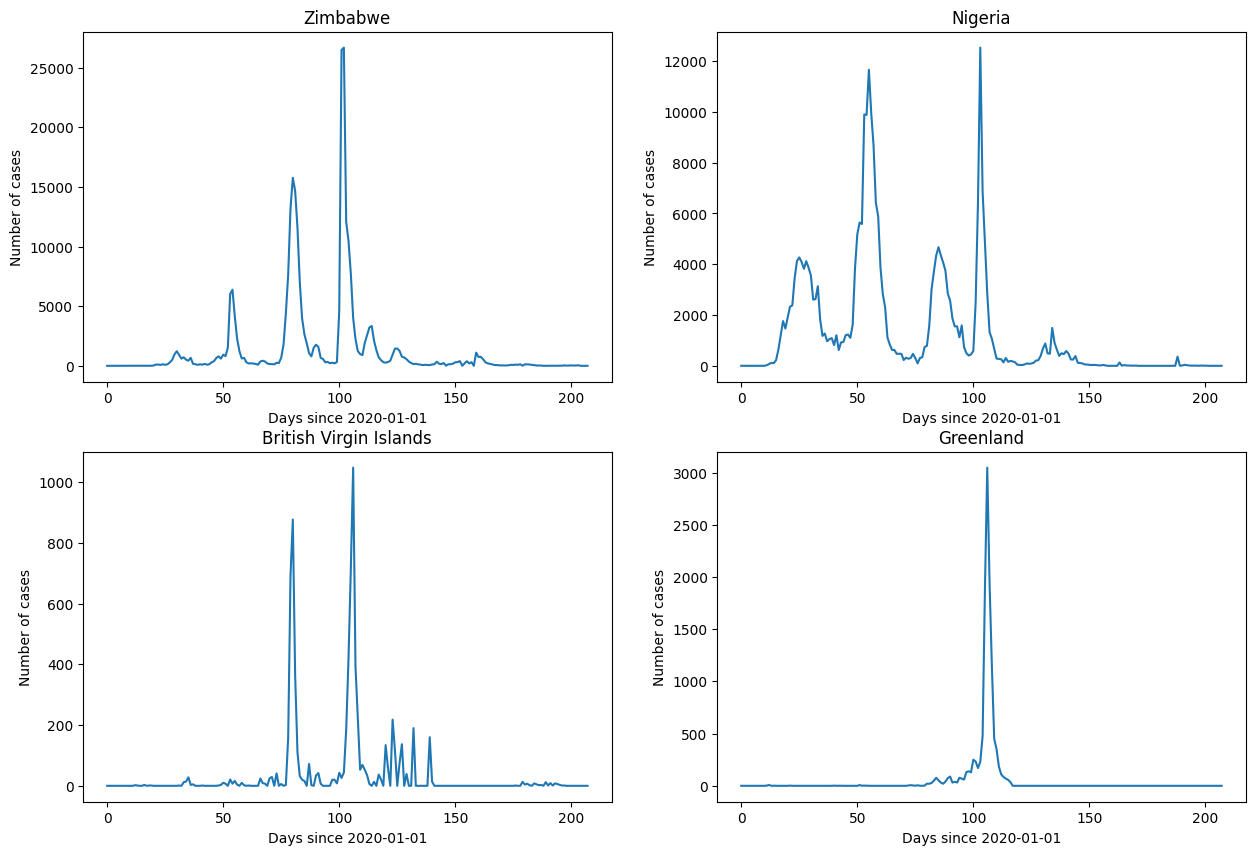

array([0., 0., 0., ..., 0., 0., 0.])

In [137]:
from sklearn.preprocessing import MinMaxScaler

countries = covid_data['Country'].unique()

new_cases = { country: daily_cases_of_country(country) for country in countries }

random_countries = np.random.choice(countries, size=4, replace=False)

# Plot the new cases for the 4 random countries

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):
    for j in range(2):
        country = random_countries[i*2+j]
        ax[i, j].plot(new_cases[country])
        ax[i, j].set_title(country)
        # Label the axes, x axis is the date and y axis is the number of cases
        ax[i, j].set_xlabel('Days since 2020-01-01')
        ax[i, j].set_ylabel('Number of cases')

plt.show()

scaler = MinMaxScaler()

for country in countries:
    new_cases[country] = scaler.fit_transform(new_cases[country].reshape(-1, 1)).flatten()

new_cases.pop('')

# Export to a format file

In [72]:
# Export the new cases data to a csv file as the following format 
# (each column is a country and each row is the number of cases for a day)

new_cases_df = pd.DataFrame(new_cases)

new_cases_df.to_csv('new_cases.csv', index=False)

# Build Casual Graph

Arguments: Namespace(cuda=False, epochs=500, kernel_size=4, hidden_layers=1, learning_rate=0.01, optimizer='Adam', log_interval=500, seed=1111, dilation_coefficient=4, significance=0.6, plot=True, ground_truth=None, data=['new_cases.csv'])

 Dataset:  new_cases.csv

 Analysis started for target:  Afghanistan
Epoch:  1 [0%] 	Loss: 0.036005
Epoch: 500 [100%] 	Loss: 0.004239
Potential causes:  [145, 143, 187, 26, 64, 227, 196]
Validated causes:  []

 Analysis started for target:  Albania
Epoch:  1 [0%] 	Loss: 0.040893
Epoch: 500 [100%] 	Loss: 0.003305
Potential causes:  [26, 44, 187, 52]
Validated causes:  [26]

 Analysis started for target:  Algeria
Epoch:  1 [0%] 	Loss: 0.031682
Epoch: 500 [100%] 	Loss: 0.003030
Potential causes:  [214, 187, 26, 196]
Validated causes:  [187]

 Analysis started for target:  American Samoa
Epoch:  1 [0%] 	Loss: 0.011812
Epoch: 500 [100%] 	Loss: 0.001834
Potential causes:  [227, 12, 191, 26, 180, 187, 64]
Validated causes:  [227]

 Analysis started for tar

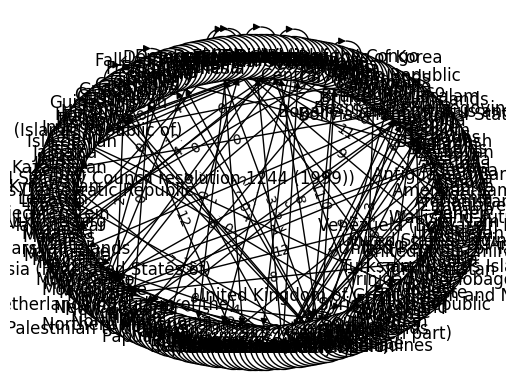

Graph exported to new_cases_causal_graph.json


In [74]:
%run -i "TCDF/runTCDF.py" --data new_cases.csv --hidden_layers 1 --epochs 500 --log_interval 500  --significance 0.6  --plot

# Read graph

In [75]:
import networkx as nx
import json

def read_graph(file_name):
    """Reads a JSON file and returns a NetworkX graph object."""
    with open(file_name, 'r') as f:
        data = json.load(f)
    G = nx.json_graph.node_link_graph(data)
    return G

# Example usage
graph_file = 'new_cases_causal_graph.json'
G = read_graph(graph_file)

# Graph analysis

Number of connected components for directed graph:
110
Connected components with more than 5 countries:


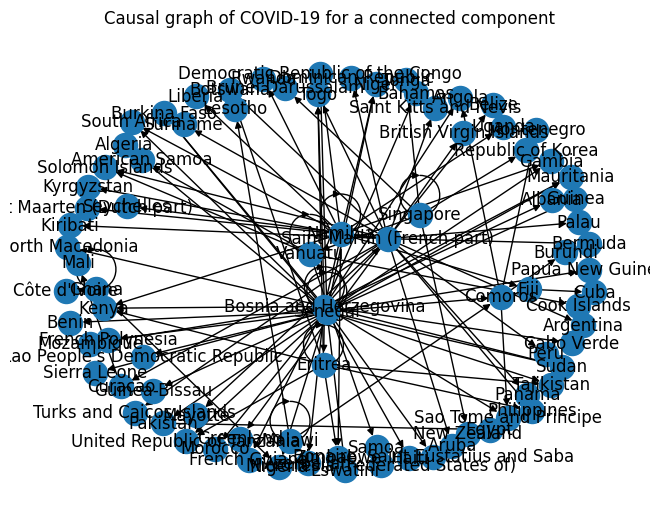

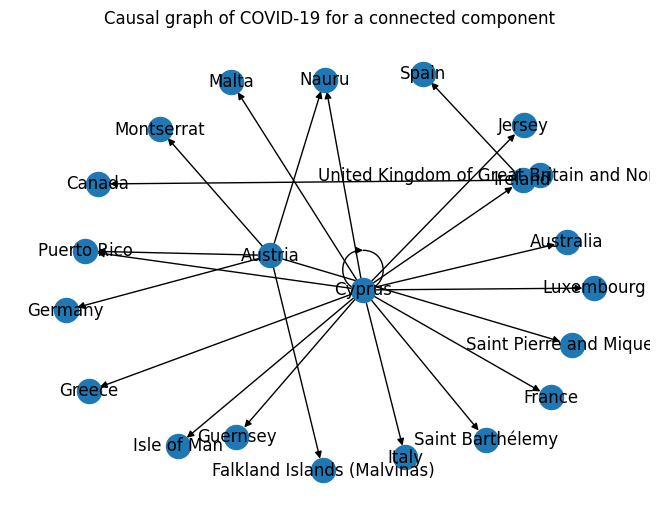

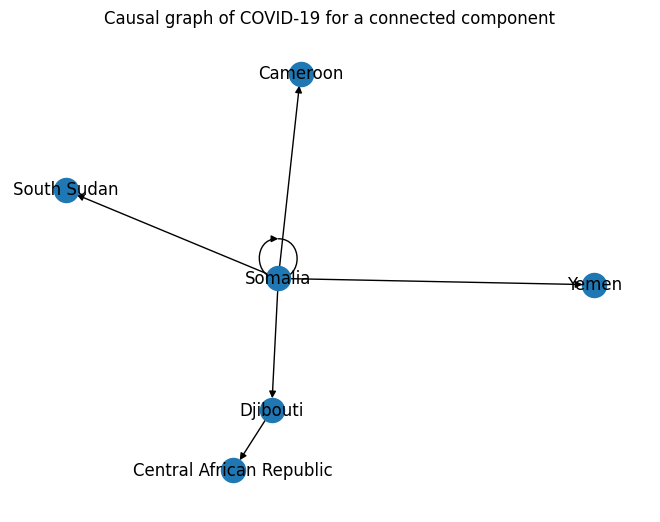

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Number of connected components for directed graph
print(f"{GREEN}{BOLD}Number of connected components for directed graph:{RESET}")
print(nx.number_weakly_connected_components(G))

# Print connected components with more than 5 countries

print(f"{GREEN}{BOLD}Connected components with more than 5 countries:{RESET}")

plotting_components = []
for component in nx.weakly_connected_components(G):
    plotting_components.append(component)
    # Plot the graph for each component
    if len(component) > 5:
        subgraph = G.subgraph(component)
        pos = nx.spring_layout(subgraph)
        nx.draw(subgraph, pos, with_labels=True)
        plt.title("Causal graph of COVID-19 for a connected component")
        plt.show()


Our graph analysis reveals that there are 110 connected components in the causal graph concerning COVID-19 cases globablly. This finding suggests that the majority of countries' new COVID-19 are not directly influenced by the case trends in other nations. This could be attributed to the widespread restrictions on international travel. Despite this, we observed three significant clusters of connected cases. THe first is a European cluster, with Cyrus appearing as a key influencer. The second is an African cluster, notably impacted by the cases trends in Somalia. The third is a more extensive global cluster, encompassing a variety of countries from different continents. These patterns offer valuable insights into pandemics's progression and the effectiveness of containment measures like travel bans.

Top 10 nodes with the highest out-degree:
Senegal: 24
Saint Martin (French part): 22
Bosnia and Herzegovina: 19
Cyprus: 14
Namibia: 11
Eritrea: 8
Austria: 6
Singapore: 6
Somalia: 5
Vanuatu: 5
Top 10 nodes with the highest in-degree:
Kenya: 3
Togo: 3
Angola: 2
Botswana: 2
Burkina Faso: 2
Comoros: 2
Democratic Republic of the Congo: 2
Eritrea: 2
Gambia: 2
Mauritania: 2


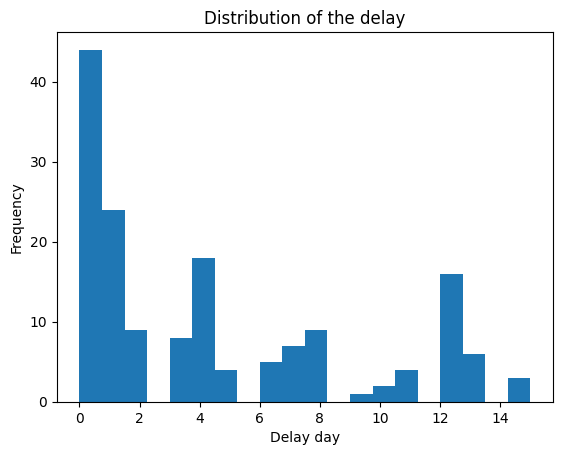

In [123]:
# Get the out-degree of each node, and print the top 10 nodes with the highest out-degree
out_degrees = G.out_degree()

sorted_out_degrees = sorted(out_degrees, key=lambda x: x[1], reverse=True)

print(f"{GREEN}{BOLD}Top 10 nodes with the highest out-degree:{RESET}")
for node, out_degree in sorted_out_degrees[:10]:
    print(f"{node}: {out_degree}")

# Print the top 10 nodes with the highest in-degree
    
in_degrees = G.in_degree()

sorted_in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)

print(f"{GREEN}{BOLD}Top 10 nodes with the highest in-degree:{RESET}")
for node, in_degree in sorted_in_degrees[:10]:
    print(f"{node}: {in_degree}")
    
# Distribution of the weights of the edges

delays = [d['weight']*3 for _, _, d in G.edges(data=True)]

plt.hist(weights, bins=20)
plt.title("Distribution of the delay")
plt.xlabel("Delay day")
plt.ylabel("Frequency")
plt.show()

In [156]:
pagerank = nx.pagerank(G)

# Print the top 10 countries with the highest pagerank score
print(f"{GREEN}{BOLD}Top 10 countries with the highest pagerank score:{RESET}")
for country, score in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{country}: {score}")





Top 10 countries with the highest pagerank score:
Estonia: 0.022832186995786263
Guatemala: 0.022832186995786263
Japan: 0.022832186995786263
Malawi: 0.022832186995786263
Nepal: 0.022832186995786263
Saudi Arabia: 0.022832186995786263
Central African Republic: 0.007681500490951647
Micronesia (Federated States of): 0.006821226794086855
Cuba: 0.0066529703320453324
United Kingdom of Great Britain and Northern Ireland: 0.006469745222469488


:
['', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana', 'Gibraltar', 'Guadeloupe', 'Guernsey', 'Holy See', 'Isle of Man', 'Jersey', 'Liechtenstein', 'Martinique', 'Mayotte', 'Pitcairn', 'Réunion', 'Saint Barthélemy', 'Saint Helena', 'Saint Martin (French part)', 'Saint Pierre and Miquelon']

AMRO:
['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia (Plurinational State of)', 'Bonaire, Saint Eustatius and Saba', 'Brazil', 'British Virgin Islands', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sint Maarten (Dutch part)', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States o

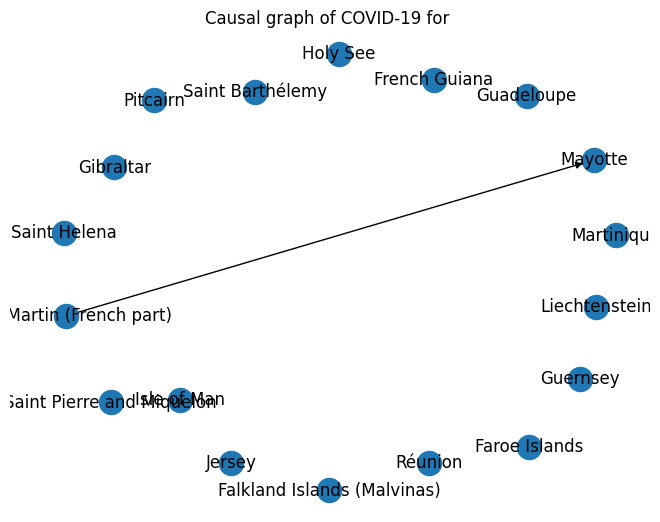

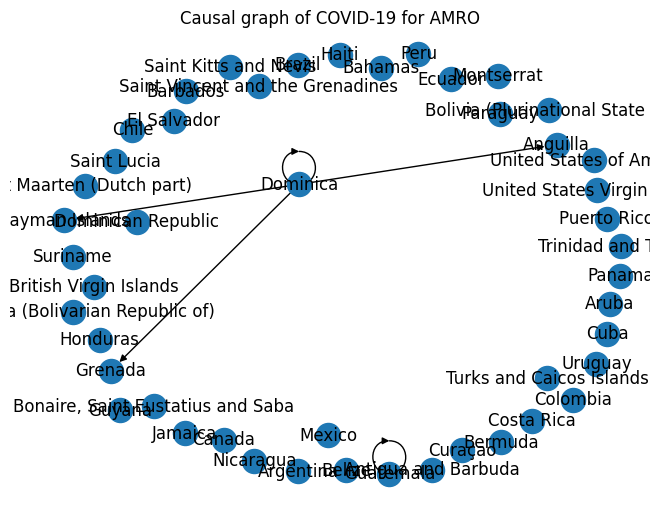

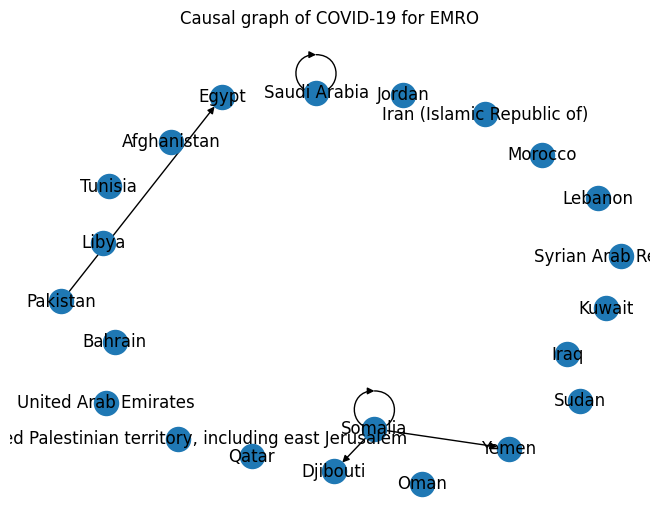

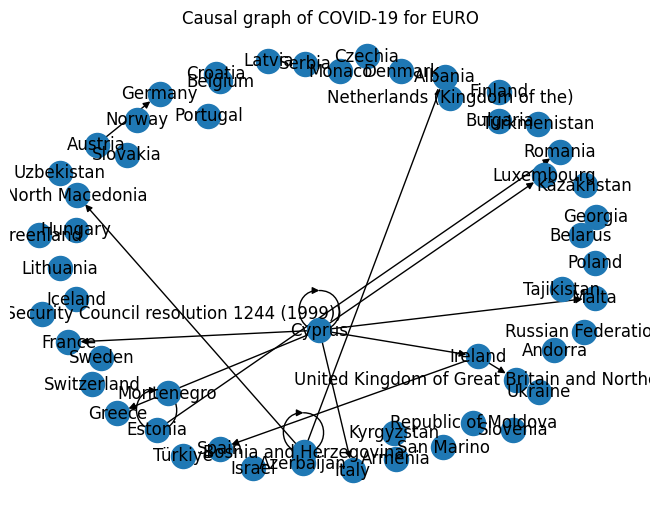

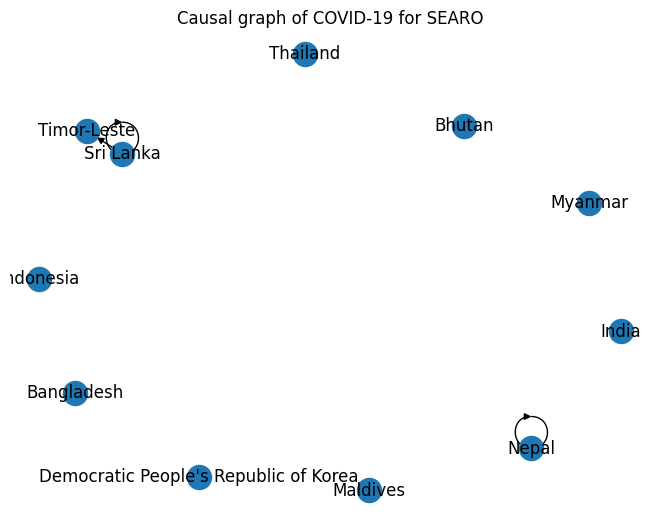

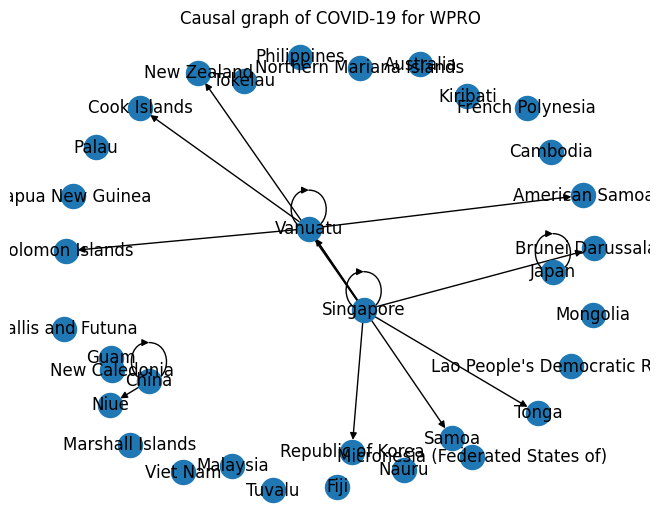

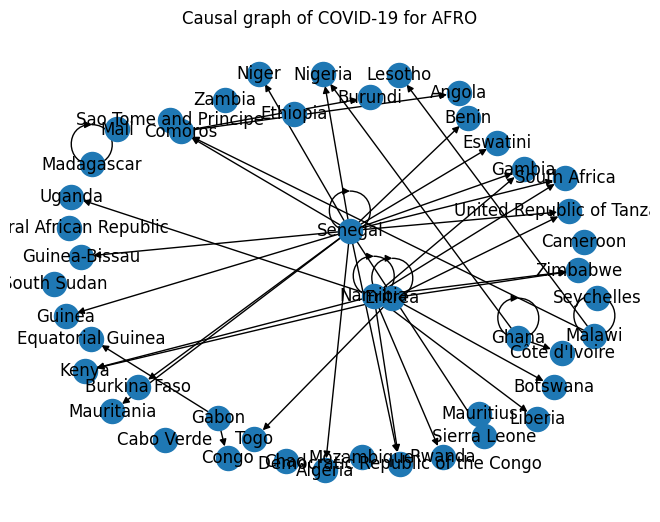

In [110]:
# Create a dictionary mapping country to WHO_region
country_to_region = covid_data.drop_duplicates(subset=['Country']).set_index('Country')['WHO_region'].to_dict()

WHO_region = set(country_to_region.values())

# Region to countries mapping

region_to_countries = { region: [] for region in WHO_region }

for country, region in country_to_region.items():
    region_to_countries[region].append(country)

for region in WHO_region:
    print(f"{GREEN}{BOLD}{region}:{RESET}")
    print(region_to_countries[region])
    print()

for region in WHO_region:
    
    subgraph = G.subgraph([country for country in G.nodes() if country_to_region[country] == region])
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True)
    plt.title(f"Causal graph of COVID-19 for {region}")

    plt.show()


Each regions shows that most of them are sparely connected except for the African Region

In [128]:
# Number of edges in the graph
print(f"{GREEN}{BOLD}Number of edges in the graph:{RESET}")
print(G.number_of_edges())

# Probability of an edge between two random nodes
print(f"{GREEN}{BOLD}Probability of an edge between two random nodes:{RESET}")
print(G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes()-1)))

Number of edges in the graph:
160
Probability of an edge between two random nodes:
0.002934595209273321


# Bootstrap the average delay

In [135]:
from scipy.stats import bootstrap

# Bootstrap the average delay

ci = bootstrap((delays,), np.mean, confidence_level=0.95, method='BCa')
ci_lower, ci_upper = ci.confidence_interval

# Print the confidence interval
print(f"{GREEN}{BOLD}Confidence interval of the average delay:{RESET} [{ci_lower}, {ci_upper}]")

Confidence interval of the average delay: [11.025, 15.28125]


# Inter-region analysis

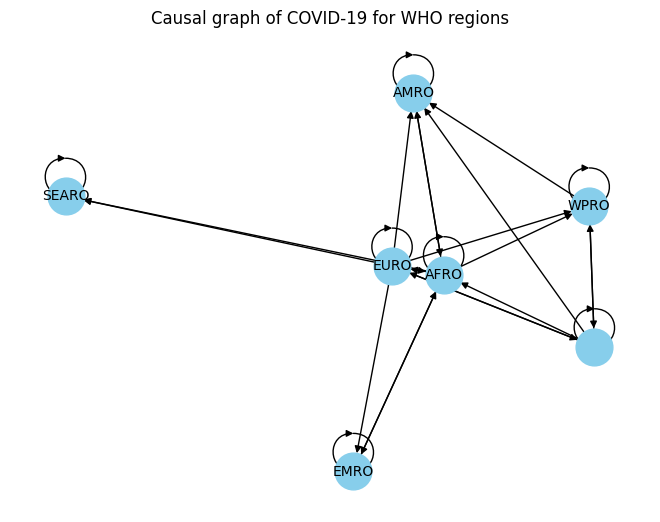

In [145]:
# Consider each region as a node, and create a new graph with weighted edges between regions

region_graph = nx.DiGraph()

for region in WHO_region:
    region_graph.add_node(region)

for u, v, d in G.edges(data=True):
    region_graph.add_edge(country_to_region[u], country_to_region[v], weight=d['weight'])

pos = nx.spring_layout(region_graph, k=2) # k is the optimal distance between nodes
nx.draw(region_graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
plt.title("Causal graph of COVID-19 for WHO regions")
plt.show()


In [153]:
# Regions by their pagerank score

region_pagerank = nx.pagerank(region_graph)

print(f"{GREEN}{BOLD}Regions by their pagerank score:{RESET}")
for region, score in sorted(region_pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{region}: {round(score,4)}")

# Regions by their in-degree

in_degrees = region_graph.in_degree()

print(f"{GREEN}{BOLD}Regions by their in-degree:{RESET}")
for region, in_degree in sorted(in_degrees, key=lambda x: x[1], reverse=True):
    print(f"{region}: {in_degree}")

# Regions by their out-degree
print(f"{GREEN}{BOLD}Regions by their out-degree:{RESET}")
for region, out_degree in sorted(region_graph.out_degree(), key=lambda x: x[1], reverse=True):
    print(f"{region}: {out_degree}")



Regions by their pagerank score:
AMRO: 0.4731
SEARO: 0.1798
WPRO: 0.1187
: 0.0791
AFRO: 0.0761
EMRO: 0.0452
EURO: 0.028
Regions by their in-degree:
AMRO: 5
AFRO: 5
WPRO: 4
: 3
EMRO: 3
EURO: 3
SEARO: 3
Regions by their out-degree:
EURO: 7
AFRO: 6
: 5
WPRO: 3
AMRO: 2
EMRO: 2
SEARO: 1


In [152]:
# Betweenness centrality of regions
    
region_betweenness = nx.betweenness_centrality(region_graph)

print(f"{GREEN}{BOLD}Regions by their betweenness centrality:{RESET}")
for region, score in sorted(region_betweenness.items(), key=lambda x: x[1], reverse=True):
    print(f"{region}: {round(score,4)}")

Regions by their betweenness centrality:
AFRO: 0.4111
EURO: 0.1056
: 0.0944
WPRO: 0.05
AMRO: 0.0389
EMRO: 0.0
SEARO: 0.0


The analysis presents AMRO as the most influential region based on its leading PageRank score, which implies a high level of importance within the network, possibly reflecting its role in the spread of COVID cases. Despite AFRO having an equivalent in-degree to AMRO, its lower PageRank score might reflect a different network position, yet it stands out in betweenness centrality, indicating its pivotal role as a conduit among regions in the context of COVID trends. The EURO region exhibits the highest out-degree, suggesting that it exerts substantial influence or connectivity, potentially disseminating COVID-related information or trends to other regions.